# Laboratorio 1 - Árboles de decisión para clasificación

**Autores**
- 138796 - Germán Otero
- 194973 - Sebastián Uriarte Güimil

**Formato de entrega**:

* Esta misma notebook en formato .ipynb
* Cambiar el nombre de la notebook por NumEst1_NumEst2_NumEst3_Lab_1.
* Es importante que la notebook pueda ejecutarse sin problemas al seleccionar 'Ejecutar todo'.
* Se considerará que sus datos pueden estar en otra localización.


**Plazo de entrega**: hasta el Domingo 22/04 a las 23:59 horas a través de Aulas.

## Librerías

In [ ]:
# Instalamos sklearn
!pip3 install scikit-learn

In [2]:
# Numeric Python
import numpy as np
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Data analysis and manipulation
import pandas as pd

# Machine learning
import sklearn

# Machine learning - Arboles
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.inspection import DecisionBoundaryDisplay

# Machine learning - Metricas
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, zero_one_loss, make_scorer

# Machine learning - Seleccion de modelos
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import validation_curve
from sklearn.model_selection import learning_curve

# Machine learning - Preprocesamiento
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

## Penguins dataset

Los datos provienen de 3 especies de pingüinos en las islas del Archipiélago Palmer, Antártida. Nuestro objetivo es **predecir la especie** en base a algunas mediciones biométricas.

**Las tres especies de pingüinos de Palmer**

![Palmer's penguins](https://allisonhorst.github.io/palmerpenguins/reference/figures/lter_penguins.png)

**Ejemplo de medición biométrica**

![Mediciones](https://allisonhorst.github.io/palmerpenguins/reference/figures/culmen_depth.png)

### Carga del dataset

In [3]:
# Cargamos el dataset
penguins = pd.read_csv('penguins.csv', dtype={'species':'category', 'island': 'category', 'sex':'category'})

In [4]:
# Información estructural del dataset
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   species            344 non-null    category
 1   island             344 non-null    category
 2   culmen_length_mm   342 non-null    float64 
 3   culmen_depth_mm    342 non-null    float64 
 4   flipper_length_mm  342 non-null    float64 
 5   body_mass_g        342 non-null    float64 
 6   sex                333 non-null    category
dtypes: category(3), float64(4)
memory usage: 12.2 KB


In [5]:
# Echamos un vistazo
penguins.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [6]:
# Variables categóricas
variables_categoricas = list(penguins.select_dtypes(include='category').columns)
print(variables_categoricas)

['species', 'island', 'sex']


In [7]:
# Variables continuas
variables_continuas = list(penguins.select_dtypes(include='float').columns)
print(variables_continuas)

['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']


### Análisis Exploratorio

#### Análisis univariado

In [8]:
# Imprimir el resumen numérico de las variables continuas

penguins.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [9]:
# Imprimir la distribución empírica (porcentajes de cada clase) de las variables categóricas
total_records=len(penguins.index)
for col in variables_categoricas:
  print(f'------------------\nVariable: {col}\n------------------')
  for c in penguins[col].dropna().unique():
      partial_records = len(penguins[penguins[col] == c].index)
      percentage = (partial_records/total_records)
      formatted_percentage = f"{percentage:.2%}"
      print(f"{c}: {formatted_percentage}")
  

------------------
Variable: species
------------------
Adelie: 44.19%
Chinstrap: 19.77%
Gentoo: 36.05%
------------------
Variable: island
------------------
Torgersen: 15.12%
Biscoe: 48.84%
Dream: 36.05%
------------------
Variable: sex
------------------
MALE: 48.84%
FEMALE: 47.97%


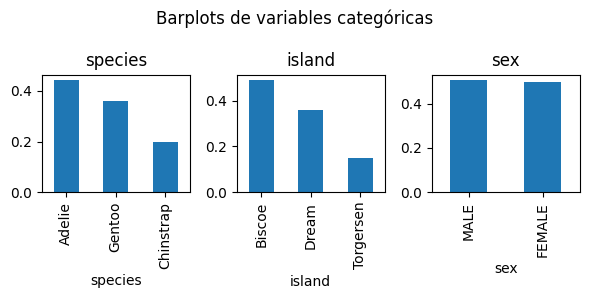

In [10]:
# Graficar los Barplots de variables categóricas

fig, axes = plt.subplots(1, len(variables_categoricas), figsize=(6,3))

for i, variable in enumerate(variables_categoricas):
    penguins[variable].value_counts(normalize=True).plot(kind="bar", ax=axes[i])
    axes[i].set_title(str(variable))

plt.suptitle('Barplots de variables categóricas')
plt.tight_layout()
plt.show()

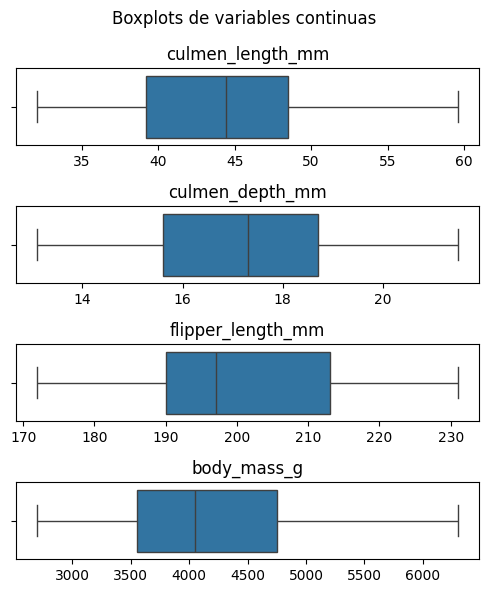

In [19]:
# Graficar los Boxplots de las variables continuas
fig, axes = plt.subplots(len(variables_continuas),1,figsize=(5,6))

for i, variable in enumerate(variables_continuas):
    sns.boxplot(data=penguins, x=variable, ax=axes[i])
    axes[i].set_xlabel('')
    axes[i].set_title(variable)

plt.suptitle('Boxplots de variables continuas')
plt.tight_layout()
plt.show()

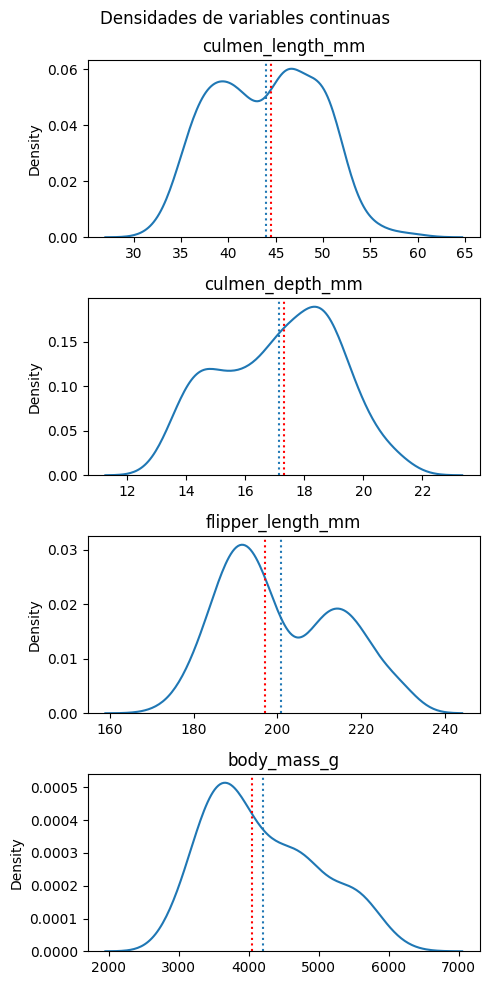

In [27]:
# Graficar las Densidades de las variables continuas indicando con segmentos verticales (punteados) la media y la mediana en cada caso
fig, axes = plt.subplots(len(variables_continuas),1,figsize=(5,10))

for i, variable in enumerate(variables_continuas):

    sns.kdeplot(data=penguins, x=variable, ax=axes[i])
    axes[i].axvline(x=penguins[variable].mean(),label="mean", linestyle='dotted')
    axes[i].axvline(x=penguins[variable].median(),label="median", linestyle='dotted', color="red")
    axes[i].set_xlabel('')
    axes[i].set_title(variable)

plt.suptitle('Densidades de variables continuas')
plt.tight_layout()
plt.show()

#### Análisis de relación entre cada atributo y el target

In [11]:
# Los atributos categóricos son todas las variables categóricas excepto species
atributos_categoricos = variables_categoricas.copy()
atributos_categoricos.remove('species')

# Los atributos continuos son todas las variables continuas
atributos_continuos = variables_continuas.copy()

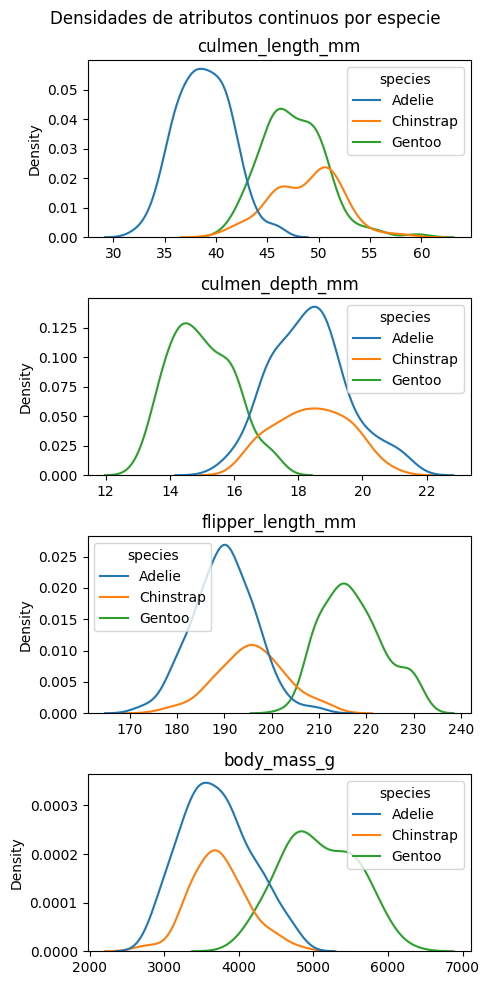

In [25]:
# Graficar las Densidades los atributos continuos con colores según la especie
fig, axes = plt.subplots(len(atributos_continuos), 1, figsize=(5,10))

for i, atributo in enumerate(atributos_continuos):
    sns.kdeplot(data=penguins, x=atributo, hue="species", ax=axes[i])
    axes[i].set_xlabel('')
    axes[i].set_title(atributo)

plt.suptitle('Densidades de atributos continuos por especie')
plt.tight_layout()
plt.show()

In [ ]:
# Imprimir las Tablas de contingencia de atributos categóricos vs species
# GO: Consultar qué es.
for atributo in atributos_categoricos:
  print(f'------------------\nAtributo: {atributo}\n------------------')
  # ...su codigo aqui...

#### Análisis multivariado

In [32]:
print("Matriz de correlación:")
penguins.corr(numeric_only=True)

Matriz de correlación:


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
culmen_length_mm,1.000000,-0.235053,0.656181,0.595110
culmen_depth_mm,-0.235053,1.000000,-0.583851,-0.471916
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202
body_mass_g,0.595110,-0.471916,0.871202,1.000000


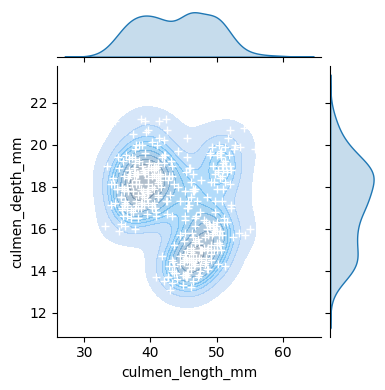

In [33]:
# Distribución conjunta de dos atributos continuos
g = sns.jointplot(
    data=penguins,
    x=variables_continuas[0],
    y=variables_continuas[1],
    kind="kde",
    fill=True,
    alpha=0.4,
    height=4
)
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
plt.show()

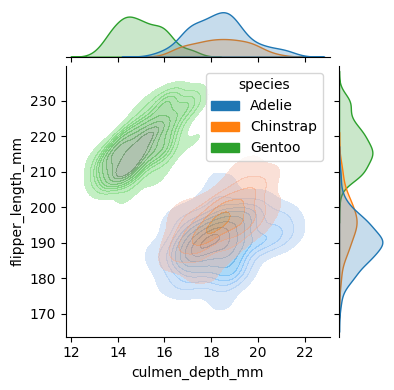

In [40]:
# Usar el código de la celda anterior como ejemplo para graficar la distribución conjunta de dos atributos continuos coloreadas por especie
# GO: Revisar en clase.
# ...su codigo aqui...
g = sns.jointplot(
    data=penguins,
    hue="species",
    x=variables_continuas[1],
    y=variables_continuas[2],
    kind="kde",
    fill=True,
    alpha=0.4,
    height=4
)
plt.show()

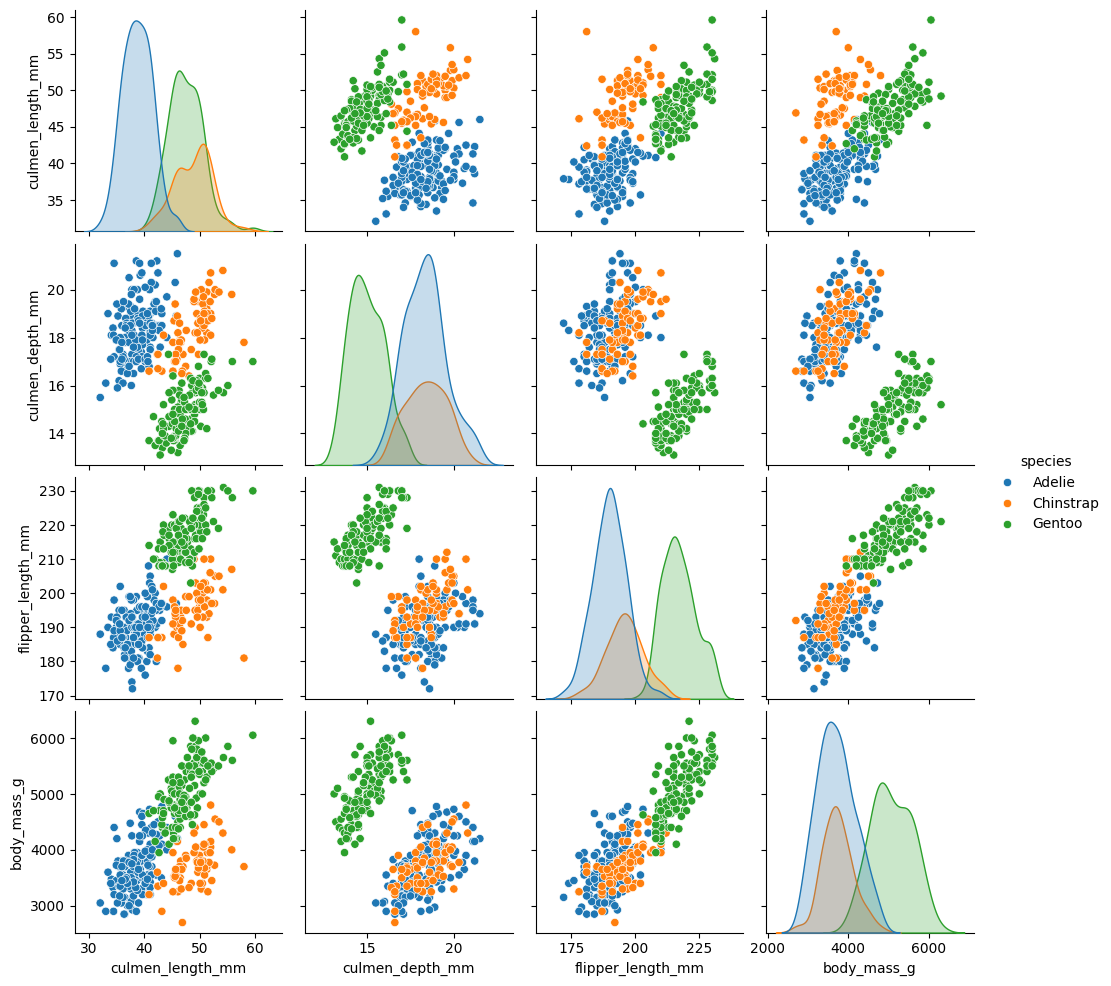

In [42]:
sns.pairplot(penguins, hue="species")

## Árboles de decisión

### Preprocesamiento

In [43]:
preprocesar_continuos = Pipeline(
    steps=[("mean_imputer", SimpleImputer(strategy="mean")),
           ("scaler", StandardScaler())]
)

preprocesar_categoricos = Pipeline(
    steps=[("mode_imputer", SimpleImputer(strategy="most_frequent")),
           ("encoder", OneHotEncoder())]
)

preprocesar = ColumnTransformer(
    transformers=[
        ("continuos", preprocesar_continuos, atributos_continuos),
        ("categoricos", preprocesar_categoricos, atributos_categoricos)
    ]
)

In [46]:
# Definimos el array de atributos (variables predictoras)
X=penguins.drop('species', axis=1)

# Definimos la etiqueta (variable target)
y=penguins['species']

In [47]:
# Dividimos en Dev - Test
dev_test_seed = 42

# Usar la funcion train_test_split para dividir los datos en 80% dev y 20% test. Usar la semilla definida.
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=dev_test_seed)

### Búsqueda de mejores hiperparámetros (Model Selection)

In [48]:
# Definimos un splitter para dividir Dev en Train - Validation repetidas veces
dev_splitter = ShuffleSplit(n_splits=10, test_size=.25, random_state=1)

In [49]:
# Definimos la métrica que vamos a usar
metrica = make_scorer(zero_one_loss)

In [59]:
# Definimos el algoritmo
# Usando Pipeline, preprocesar y DecisionTreeClassifier definir el algoritmo a utilizar
# ...su codigo aqui...
clf = Pipeline(steps=[
    ('preprocessor', preprocesar),
    ('classifier', DecisionTreeClassifier())
])

In [60]:
# Sesgo inductivo
# Ejemplos de hiperparámetros:
# max_depth, min_samples_split, min_samples_leaf, min_impurity_decrease, ccp_alpha

d_max = 12

# Usar validation_curve para calcular los errores en train y validation, para max_depth variando en un rango de 1 a d_max.
# Utilizar el splitter definido anteriormente
# Utilizar la metrica definida anteriormente

# ...su codigo aqui...
train_scores, valid_scores = validation_curve(
    clf, train_X, train_y, param_name="classifier__max_depth", param_range=range(1, d_max+1),
    cv=dev_splitter, scoring=metrica
)

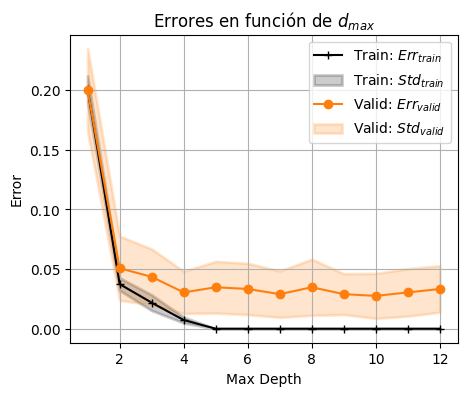

In [61]:
# Graficamos los scores y sus variabilidad

# Train
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)

# Validation
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

# Ploteamos
plt.figure(figsize=(5, 4))
plt.plot(range(1,d_max+1), train_scores_mean, '-+', color='black')
plt.fill_between(
    range(1,d_max+1),
    train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std,
    alpha=0.2,
    color="black",
    lw=2,
)

plt.plot(range(1,d_max+1), valid_scores_mean, '-o', color='tab:orange')

plt.fill_between(
    range(1,d_max+1),
    valid_scores_mean - valid_scores_std,
    valid_scores_mean + valid_scores_std,
    alpha=0.2,
    color="tab:orange",
    lw=2,
)

plt.xlabel('Max Depth')
plt.ylabel('Error')
plt.title(r'Errores en función de $d_{max}$')
plt.legend([r'Train: $Err_{train}$',r'Train: $Std_{train}$',r'Valid: $Err_{valid}$',r'Valid: $Std_{valid}$'])
plt.grid(True)
plt.show()

### Evaluación del mejor hiperparámetro (Model Evaluation)

In [70]:
# Elegir el mejor hiperparámetro
# GO: .fit y .predict, evaluar error.
d_best = 4

# Definir nuevamente el algoritmo utilizando el valor de d_best
# ...su codigo aqui...

clf_best = Pipeline(steps=[
    ('preprocessor', preprocesar),
    ('classifier', DecisionTreeClassifier(max_depth=d_best))
])

In [71]:
# Definimos un splitter para que haga la misma división en Dev y Test que ya teníamos (usamos la misma seed)
test_splitter = ShuffleSplit(n_splits=1, test_size=.20, random_state=dev_test_seed)

In [72]:
# Utilizar learning_curve para explorar la evolucion de los errores en dev y test en funcion de la cantidad de datos en dev
# Utilizar el splitter test_splitter
# Utilizar la metrica definida anteriormente

# ...su codigo aqui...
dev_sizes, dev_scores, test_scores = learning_curve(
    clf_best, train_X, train_y, cv=test_splitter, scoring=metrica
)

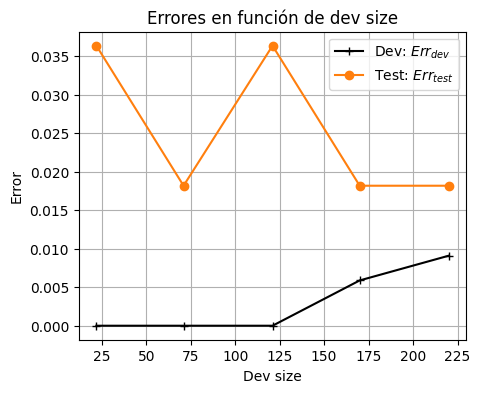

In [73]:
plt.figure(figsize=(5, 4))
plt.plot(dev_sizes, dev_scores, '-+', color='black')

plt.plot(dev_sizes, test_scores, '-o', color ='tab:orange')

plt.xlabel('Dev size')
plt.ylabel('Error')
plt.title(r'Errores en función de dev size')
plt.legend([r'Dev: $Err_{dev}$',r'Test: $Err_{test}$'])
plt.grid(True)
plt.show()

In [74]:
# Entrenar utilizando el metodo .fit
# ...su codigo aqui...
clf_best = clf_best.fit(train_X, train_y)

In [75]:
# Obtener las predicciones en dev utilizando .predict
y_hat_dev = clf_best.predict(train_X)

# Obtener las predicciones en test utilizando .predict
y_hat_test = clf_best.predict(test_X)

In [76]:
# Calcular el error en dev (riesgo empírico)
error_dev = zero_one_loss(train_y, y_hat_dev)
print(f'Error en dev (riesgo empírico): {error_dev:.4f}')

# Calcular el error en test
error_test = zero_one_loss(test_y, y_hat_test)
print(f'Error en test: {error_test:.4f}')

Error en dev (riesgo empírico): 0.0109
Error en test: 0.0290


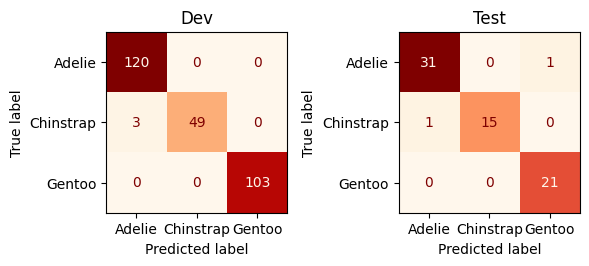

In [77]:
# Matrices de confusión
fig, axes = plt.subplots(1,2,figsize=(6,3))

# Calcular la matriz de confusion en Dev
cm_dev = confusion_matrix(train_y, y_hat_dev)
disp_dev = ConfusionMatrixDisplay(confusion_matrix=cm_dev, display_labels=clf_best.classes_)
disp_dev.plot(cmap="OrRd", ax=axes[0], colorbar=False)
axes[0].set_title('Dev')

# Calcular la matriz de confusion en Test
cm_test = confusion_matrix(test_y, y_hat_test)
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=clf_best.classes_)
disp_test.plot(cmap="OrRd", ax=axes[1], colorbar=False)
axes[1].set_title('Test')

plt.tight_layout()
plt.show()

### Entrenamos con todos los datos y graficamos la hipótesis obtenida

In [80]:
# Redefinir el algoritmo para ser entrenado con todos los datos disponibles
clf_final = Pipeline(steps=[
    ('preprocessor', preprocesar),
    ('classifier', DecisionTreeClassifier(max_depth=d_best))
])

In [81]:
# Entrenamos con todos los datos usando .fit
# ...su codigo aqui...
clf_final = clf_final.fit(X, y)

[Text(0.6527777777777778, 0.9, 'x[2] <= 0.399\ngini = 0.636\nsamples = 344\nvalue = [152.0, 68.0, 124.0]'),
 Text(0.4166666666666667, 0.7, 'x[0] <= 0.134\ngini = 0.427\nsamples = 215\nvalue = [150, 63, 2]'),
 Text(0.2222222222222222, 0.5, 'x[0] <= -0.289\ngini = 0.087\nsamples = 154\nvalue = [147, 6, 1]'),
 Text(0.1111111111111111, 0.3, 'x[1] <= -0.255\ngini = 0.014\nsamples = 139\nvalue = [138, 1, 0]'),
 Text(0.05555555555555555, 0.1, 'gini = 0.165\nsamples = 11\nvalue = [10, 1, 0]'),
 Text(0.16666666666666666, 0.1, 'gini = 0.0\nsamples = 128\nvalue = [128, 0, 0]'),
 Text(0.3333333333333333, 0.3, 'x[8] <= 0.5\ngini = 0.524\nsamples = 15\nvalue = [9, 5, 1]'),
 Text(0.2777777777777778, 0.1, 'gini = 0.0\nsamples = 5\nvalue = [0, 5, 0]'),
 Text(0.3888888888888889, 0.1, 'gini = 0.18\nsamples = 10\nvalue = [9, 0, 1]'),
 Text(0.6111111111111112, 0.5, 'x[5] <= 0.5\ngini = 0.124\nsamples = 61\nvalue = [3, 57, 1]'),
 Text(0.5555555555555556, 0.3, 'x[1] <= -0.255\ngini = 0.375\nsamples = 4\nvalu

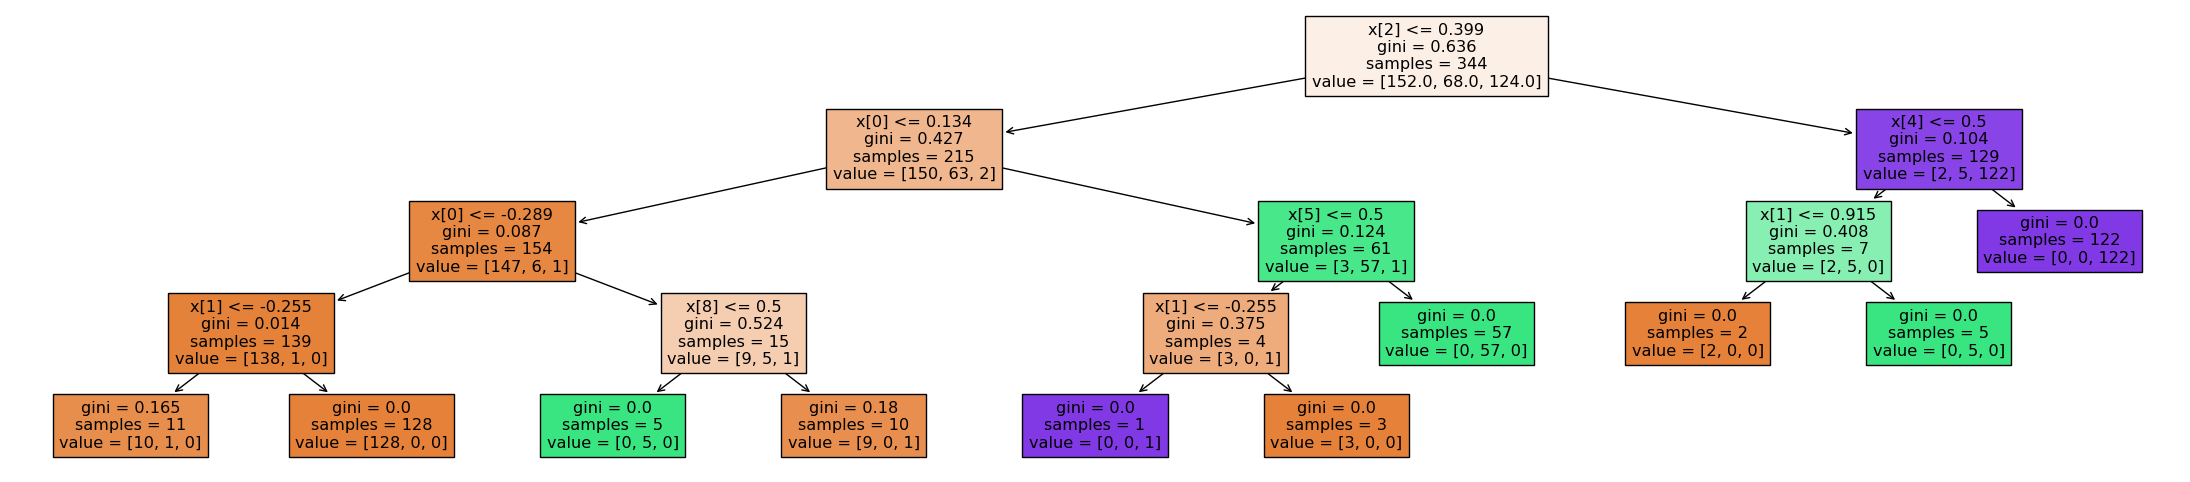

In [85]:
# Usar la funcion plot_tree para visualizar el arbol
plt.figure(figsize=(28,6))
# ...su codigo aqui...

plot_tree(clf_final["classifier"], filled=True)

